| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./5.Reglas_de_Asociacion.ipynb)| [⏩](./7.Deep_Learning.ipynb)|

# **6. Reinforcement Learning**

## **Upper Confidence Bound (UCB)**

Upper Confidence Bound `(UCB)` es un algoritmo de aprendizaje por refuerzo utilizado en la toma de decisiones. Su objetivo es maximizar la recompensa al elegir la mejor opción posible en un conjunto de opciones disponibles.

La idea principal detrás de `UCB` es que el algoritmo debe explorar nuevas opciones mientras también aprovecha las opciones conocidas que han demostrado tener un buen rendimiento. En resumen, `UCB` es un equilibrio entre la exploración y la explotación.

El algoritmo de `UCB` utiliza una fórmula para calcular la recompensa esperada de cada opción. Esta fórmula tiene dos partes: la primera es la media de la recompensa obtenida hasta el momento para cada opción y la segunda es una medida de la incertidumbre o varianza en la estimación de la recompensa. Cuanto mayor sea la incertidumbre, mayor será la contribución de la segunda parte de la fórmula.

En el siguiente ejemplo, se puede ver cómo implementar `UCB` en Python para elegir la mejor opción de un conjunto de opciones disponibles:

In [1]:
import numpy as np

class UCB:
    def __init__(self, n_options):
        self.n_options = n_options
        self.n_selections = np.zeros(n_options)
        self.sum_rewards = np.zeros(n_options)
        self.total_rewards = 0
        
    def select_option(self):
        ucb_values = np.zeros(self.n_options)
        for i in range(self.n_options):
            if self.n_selections[i] == 0:
                ucb_values[i] = np.inf
            else:
                average_reward = self.sum_rewards[i] / self.n_selections[i]
                delta_i = np.sqrt(2 * np.log(self.total_rewards) / self.n_selections[i])
                ucb_values[i] = average_reward + delta_i
        option = np.argmax(ucb_values)
        return option
    
    def update(self, option, reward):
        self.n_selections[option] += 1
        self.sum_rewards[option] += reward
        self.total_rewards += reward


En este ejemplo, la clase `UCB` se utiliza para elegir la mejor opción de un conjunto de opciones. El constructor de la clase toma como argumento el número de opciones disponibles. El método `select_option()` calcula la recompensa esperada de cada opción utilizando la fórmula de `UCB`, y devuelve la opción con la recompensa esperada más alta. El método `update()` se utiliza para actualizar la información sobre la recompensa obtenida para cada opción después de seleccionar una opción.

Para visualizar el rendimiento del algoritmo, se puede utilizar una gráfica que muestre la recompensa acumulada en función del número de iteraciones o selecciones. Por ejemplo:

/tmp/ipykernel_8182/1753100196.py:17: RuntimeWarning: divide by zero encountered in log
  delta_i = np.sqrt(2 * np.log(self.total_rewards) / self.n_selections[i])
/tmp/ipykernel_8182/1753100196.py:17: RuntimeWarning: invalid value encountered in sqrt
  delta_i = np.sqrt(2 * np.log(self.total_rewards) / self.n_selections[i])


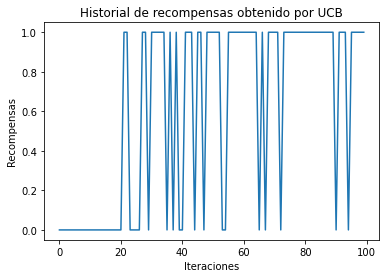

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Definimos las opciones y las recompensas para cada opción
options = ['Opción 1', 'Opción 2', 'Opción 3']
rewards = [0.1, 0.5, 0.8]

# Creamos una instancia de UCB
ucb = UCB(len(options))

# Ejecutamos el algoritmo durante 100 iteraciones
n_iterations = 100
reward_history = []
for i in range(n_iterations):
    option = ucb.select_option()
    reward = np.random.binomial(1, rewards[option])
    ucb.update(option, reward)
    reward_history.append(reward)

# Graficamos el historial de recompensas obtenido por el algoritmo en cada iteración
plt.plot(range(n_iterations), reward_history)
plt.xlabel('Iteraciones')
plt.ylabel('Recompensas')
plt.title('Historial de recompensas obtenido por UCB')
plt.show()


En este ejemplo, se definen tres opciones y sus recompensas correspondientes. Se crea una instancia de `UCB` con el número de opciones y se ejecuta el algoritmo durante `100` iteraciones. En cada iteración, se selecciona una opción con la función `select_option()` y se simula una recompensa con una distribución binomial con una probabilidad de éxito igual a la recompensa correspondiente de la opción seleccionada. Luego, se actualiza la información de la opción seleccionada y se guarda la recompensa obtenida en el historial. Finalmente, se grafica el historial de recompensas obtenido por el algoritmo en cada iteración.

## **Muestreo Thompson**

El Muestreo Thompson o Thompson Sampling es un algoritmo de toma de decisiones que se utiliza en el aprendizaje por refuerzo para elegir la mejor acción a tomar en cada momento en función de las recompensas obtenidas en el pasado. Este algoritmo se basa en la idea de que la mejor opción a elegir es aquella que tiene la mayor probabilidad de dar la mejor recompensa, por lo que Thompson Sampling utiliza un enfoque probabilístico para elegir la mejor opción.

El algoritmo de Muestreo Thompson se compone de dos fases: la fase de inicialización y la fase de exploración. Durante la fase de inicialización, se generan muestras aleatorias de las distribuciones de probabilidad para cada opción y se selecciona la opción con la muestra más alta como la mejor opción inicial. Durante la fase de exploración, se actualizan las distribuciones de probabilidad para cada opción en función de las recompensas obtenidas y se generan nuevas muestras aleatorias. A medida que se obtienen más recompensas, las distribuciones de probabilidad se ajustan y se selecciona la mejor opción con mayor frecuencia.

A continuación, se presenta un ejemplo de cómo implementar el algoritmo de Muestreo Thompson en Python utilizando la biblioteca `NumPy` y `Matplotlib`:

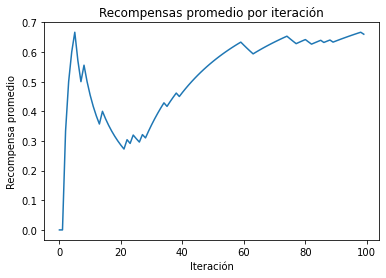

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos las opciones y las distribuciones de probabilidad
options = ['Opción 1', 'Opción 2', 'Opción 3']
priors = [(np.random.beta(1, 1), 2) for i in range(len(options))]  # Distribuciones Beta iniciales

# Ejecutamos el algoritmo durante 100 iteraciones
n_iterations = 100
reward_history = []
for i in range(n_iterations):
    # Generamos una muestra aleatoria para cada opción
    samples = [np.random.beta(reward + 1, total - reward + 1) for reward, total in priors]
    # Seleccionamos la opción con la muestra más alta
    option = np.argmax(samples)
    # Obtenemos la recompensa de la opción seleccionada
    reward = np.random.binomial(1, rewards[option])
    # Actualizamos la distribución de probabilidad para la opción seleccionada
    priors[option] = (priors[option][0] + reward, priors[option][1] + 1)
    # Almacenamos la recompensa obtenida
    reward_history.append(reward)

# Graficamos la evolución de las recompensas
plt.plot(np.cumsum(reward_history) / np.arange(1, n_iterations + 1))
plt.title('Recompensas promedio por iteración')
plt.xlabel('Iteración')
plt.ylabel('Recompensa promedio')
plt.show()


En este ejemplo, se definen las opciones disponibles y las distribuciones de probabilidad iniciales utilizando una distribución Beta con parámetros `(1, 1)` para cada opción. Luego, se ejecuta el algoritmo durante `100` iteraciones, generando muestras aleatorias de las distribuciones de probabilidad para cada opción y seleccionando la opción con la muestra más alta. Se obtiene la recompensa de la opción seleccionada y se actualiza la distribución de probabilidad utilizando la regla de Bayes. Finalmente, se grafica la evolución de las recompensas promedio por iteración.

| **Inicio** | **atrás 5** | **Siguiente 7** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./5.Reglas_de_Asociacion.ipynb)| [⏩](./7.Deep_Learning.ipynb)|